# Устанавливаем и импортируем пакет stats:

In [1]:
!pip install stats

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import stats.base as stbs
import stats.stats as st
import stats.plot as plt

# 1. Пакет stats.base

В этом подпакете содержаться функции для скачивания и первичной обработки данных. Например, функция download_csv, позволяющая скачать csv-файл через его url:

In [6]:
raw_data = stbs.download_csv('https://raw.githubusercontent.com/plotly/datasets/master/Mining-BTC-180.csv')

Теперь изпользуем функцию make_columns, чтобы привести данные в удобный формат.

In [32]:
less_raw_data = stbs.make_columns(raw_data)
[{column: less_raw_data[column][0]} for column in less_raw_data]

[{'': '0'},
 {'Date': '2017-04-29 00:00:00'},
 {'Number-transactions': '341319'},
 {'Output-volume(BTC)': '4488916'},
 {'Market-price': '3119179'},
 {'Hash-rate': '4488916'},
 {'Cost-per-trans-USD': '9'},
 {'Mining-revenue-USD': '3119179'},
 {'Transaction-fees-BTC': '256'}]

Посмотрев на первую строку в данных видно, что почти все столбцы было бы удобно привести к числовому формату. Изпользуем функцию make_numeric, чтобы привести к типу float все столбцы, которые сможем.

In [37]:
data = {key: stbs.make_numeric(less_raw_data[key]) for key in less_raw_data}
[{column: data[column][0]} for column in data]

[{'': 0.0},
 {'Date': '2017-04-29 00:00:00'},
 {'Number-transactions': 341319.0},
 {'Output-volume(BTC)': 4488916.0},
 {'Market-price': 3119179.0},
 {'Hash-rate': 4488916.0},
 {'Cost-per-trans-USD': 9.0},
 {'Mining-revenue-USD': 3119179.0},
 {'Transaction-fees-BTC': 256.0}]

# 2. Пакет stats.stats

Этот подпакет содержит основные функции для статитистического анализа данных.

Можем взять среднее:

In [39]:
st.mean(data['Cost-per-trans-USD'])

27.223463687150836

Медиану:

In [41]:
st.median(data['Cost-per-trans-USD'])

26.0

Стандартное отклонение:

In [51]:
st.std(data['Transaction-fees-BTC'])

129.19839114767439

Корреляцию:

In [47]:
st.correlation(data['Transaction-fees-BTC'], data['Cost-per-trans-USD'])

-0.41453619643547324

In [49]:
st.correlation(data['Output-volume(BTC)'], data['Mining-revenue-USD'])

0.8646502241764542

Квантиль:

In [53]:
st.quantile(data['Number-transactions'], 0.5)

267360.0

# 3. Пакет stats.plot

Этот пакет содержит функции для построения графиков по данным.

1. Обычный график (обертка функции plot из mathplotlib.pyplot)

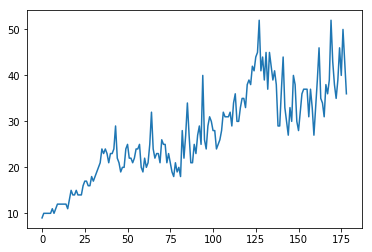

In [55]:
plt.plot(data['Cost-per-trans-USD'])

2. Boxplot

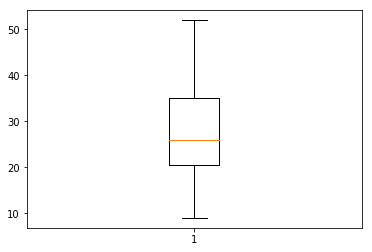

In [57]:
plt.box_plot(data['Cost-per-trans-USD'])

3. Гистограмма

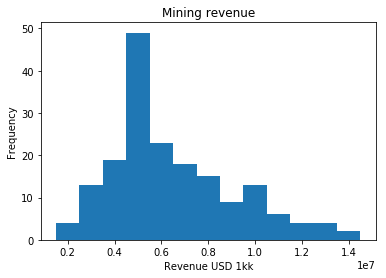

In [72]:
plt.hist(data['Mining-revenue-USD'], 1000000, title='Mining revenue', xlabel='Revenue USD 1kk', ylabel='Frequency')